# <a id='toc1_'></a>[Assignment 02](#toc0_)
## <a id='toc1_1_'></a>[Marvin Schumann (63529)](#toc0_)

**Table of contents**<a id='toc0_'></a>        
- [Question 1 (Exploratory Data Analysis)](#toc4_)    
      - [Q1.1 - Provide three insights you extracted from the EDA analysis [Free text + code] 3 points](#toc4_1_1_1_)    
- [Question 2 (Clustering)](#toc5_)    
      - [Q2.1 - Number of Customer Segments](#toc5_1_1_1_)    
      - [Q2.2 - Are the Segments Well Defined? How Did You Measure It?](#toc5_1_1_2_)    
      - [Q2.3 - Interpretation of the Clusters](#toc5_1_1_3_)    
- [Question 3 (Predicting loyalty)](#toc6_)    
      - [Q3.1 - Develop Two Models](#toc6_1_1_1_)    
      - [Q3.2 - Model Choice and Metric](#toc6_1_1_2_)    
- [Question 4 (Recommendation System)](#toc7_)    
      - [Q4.1 - Developing a Recommendation System Aligned with Customer Behavior](#toc7_1_1_1_)    
      - [Q4.2 - Evaluating the Model](#toc7_1_1_2_)    
      - [Q4.3 - Suggestions to Improve the Dataset](#toc7_1_1_3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc2_'></a>[Load and Inspect the Dataset](#toc0_)
Load the dataset into a Pandas DataFrame and inspect its structure, including column names, data types, and missing values.

In [1]:
import pandas as pd

# Load the dataset into a Pandas DataFrame
file_path = "SmartRetail_Dataset.csv"  # Replace with the actual path to the dataset
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [2]:
# Display the column names and data types
print("\nColumn names and data types:")
print(df.dtypes)

# Check for missing values in the dataset
print("\nMissing values in each column:")
print(df.isnull().sum())


Column names and data types:
Customer ID                 int64
Age                         int64
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo Code Used            object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
dtype: object

Missing values in each column:
Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subs

# <a id='toc3_'></a>[Data Cleaning and Preprocessing](#toc0_)
Handle missing values, remove duplicates, and ensure data types are appropriate for analysis.

In [3]:
# Handle missing values
# Fill missing numerical values with the median of their respective columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

# Fill missing categorical values with the mode of their respective columns
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

# Remove duplicate rows
df = df.drop_duplicates()

# Ensure data types are appropriate for analysis
# Convert 'Customer ID' to string if it is not already
if df['Customer ID'].dtype != 'object':
    df['Customer ID'] = df['Customer ID'].astype(str)

# Convert 'Purchase Amount (USD)' to float if it is not already
if df['Purchase Amount (USD)'].dtype != 'float64':
    df['Purchase Amount (USD)'] = df['Purchase Amount (USD)'].astype(float)

# Display the cleaned dataset information
print("\nDataset after cleaning:")
print(df.info())


Dataset after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   object 
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   float64
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used

In [4]:
# Map categorical values to numerical or fewer categories

# Convert 'Frequency of Purchases' to a numerical value
df['Frequency (per year)'] = df['Frequency of Purchases'].map({
    'Bi-Weekly' : 52*2,
    'Fortnightly': 52/2,
    'Weekly': 52,
    'Monthly': 12,
    'Quarterly': 4,
    'Every 3 Months': 4,
    'Annually': 1
})

# Map locations to regions
location_mapping = {
    # Northeast
    'New York': 'Northeast',
    'Maryland': 'Northeast',
    'Delaware': 'Northeast',
    'Vermont': 'Northeast',
    'Connecticut': 'Northeast',
    'Virginia': 'Northeast',
    'Maine': 'Northeast',
    'New Hampshire': 'Northeast',
    'Massachusetts': 'Northeast',
    'New Jersey': 'Northeast',
    'Pennsylvania': 'Northeast',
    'Rhode Island': 'Northeast',

    # Midwest
    'Illinois': 'Midwest',
    'Minnesota': 'Midwest',
    'Nebraska': 'Midwest',
    'North Dakota': 'Midwest',
    'Missouri': 'Midwest',
    'Indiana': 'Midwest',
    'Ohio': 'Midwest',
    'Wisconsin': 'Midwest',
    'Michigan': 'Midwest',
    'South Dakota': 'Midwest',
    'Iowa': 'Midwest',
    'Kansas': 'Midwest',

    # South
    'Alabama': 'South',
    'Louisiana': 'South',
    'West Virginia': 'South',
    'New Mexico': 'South',
    'Mississippi': 'South',
    'Georgia': 'South',
    'Kentucky': 'South',
    'Arkansas': 'South',
    'North Carolina': 'South',
    'Tennessee': 'South',
    'Texas': 'South',
    'South Carolina': 'South',
    'Oklahoma': 'South',
    'Florida': 'South',

    # West
    'Montana': 'West',
    'California': 'West',
    'Idaho': 'West',
    'Nevada': 'West',
    'Colorado': 'West',
    'Oregon': 'West',
    'Washington': 'West',
    'Alaska': 'West',
    'Wyoming': 'West',
    'Utah': 'West',
    'Arizona': 'West',
    'Hawaii': 'West'
}

# Map locations to regions
df['Region'] = df['Location'].map(location_mapping)

# Check if the Region column was created successfully
print(df[['Location', 'Region', 'Frequency (per year)', 'Frequency of Purchases']].head())

        Location     Region  Frequency (per year) Frequency of Purchases
0       Kentucky      South                  26.0            Fortnightly
1          Maine  Northeast                  26.0            Fortnightly
2  Massachusetts  Northeast                  52.0                 Weekly
3   Rhode Island  Northeast                  52.0                 Weekly
4         Oregon       West                   1.0               Annually


In [5]:
# Define numerical and categorical columns
numerical_features = ['Age', 'Purchase Amount (USD)', 'Previous Purchases', 'Frequency (per year)']
categorical_features = ['Gender', 'Category', 'Region', 'Season', 'Subscription Status', 
                        'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Payment Method']

In [6]:
# Scale numerical features and one-hot encode categorical features
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# One-hot encode categorical features
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)

# Standardize numerical features
numerical_transformer = StandardScaler()

# Combine transformations into a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Apply transformations to the dataset
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
prepared_data = pipeline.fit_transform(df)

# Convert the transformed data back into a DataFrame
prepared_columns = numerical_features + list(pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features))
prepared_df = pd.DataFrame(prepared_data, columns=prepared_columns)

# Display the first few rows of the prepared dataset
print("\nPrepared dataset:")
prepared_df.head()


Prepared dataset:


,Age,Purchase Amount (USD),Previous Purchases,Frequency (per year),Gender_Male,Category_Clothing,Category_Footwear,Category_Outerwear,Region_Northeast,Region_South,...,Shipping Type_Next Day Air,Shipping Type_Standard,Shipping Type_Store Pickup,Discount Applied_Yes,Promo Code Used_Yes,Payment Method_Cash,Payment Method_Credit Card,Payment Method_Debit Card,Payment Method_PayPal,Payment Method_Venmo
0,0.718913,-0.285629,-0.785831,-0.069528,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,-1.648629,0.178852,-1.616552,-0.069528,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
2,0.390088,0.558882,-0.162789,0.680173,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
3,-1.517099,1.276716,1.637107,0.680173,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.061263,-0.454531,0.391025,-0.790395,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


# <a id='toc4_'></a>[Question 1 (Exploratory Data Analysis)](#toc0_)

#### <a id='toc4_1_1_1_'></a>[Q1.1 - Provide three insights you extracted from the EDA analysis [Free text + code] 3 points](#toc0_) [&#8593;](#toc0_)

1. **Perfect Overlap Between Discounts and Promo Codes**  
   - The _Matrix of Discount Applied vs Promo Code Used_ shows a perfect overlap: customers who applied a discount always used a promo code, and those who did not apply a discount never used a promo code. This suggests that discounts and promo codes are directly tied together in the dataset.

2. **Male Customers Dominate Subscriptions, Discounts, and Promo Code Usage**  
   - From the _Bar Plot of Subscription Status, Discount Applied, and Promo Code Used by Gender_, 39.7% of male customers are subscribed, and 63.2% of male customers applied discounts and used promo codes. Female customers, however, show no activity in these areas, indicating a lack of representation or engagement in the dataset.

3. **Potential Dataset Imbalance Across Genders**  
   - The absence of female customers in subscription, discount, and promo code usage suggests a potential imbalance in the dataset. This could indicate either a lack of data for female customers or that these behaviors are exclusive to male customers.

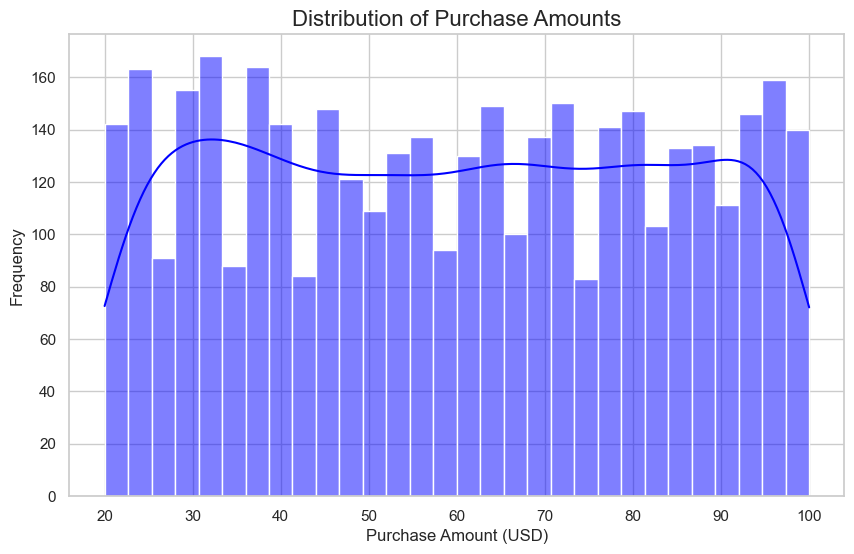

/var/folders/_j/pxtg33rs3657dcdtz9vydvkc0000gn/T/ipykernel_46881/2124336620.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Purchase Amount (USD)', data=df, palette='pastel')


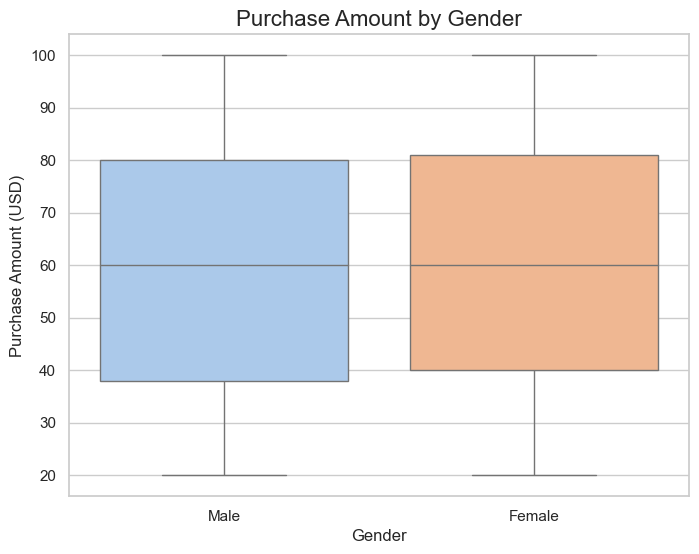

/var/folders/_j/pxtg33rs3657dcdtz9vydvkc0000gn/T/ipykernel_46881/2124336620.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age Group', data=df, palette='muted', order=['<18', '18-35', '36-50', '51-65', '65+'])


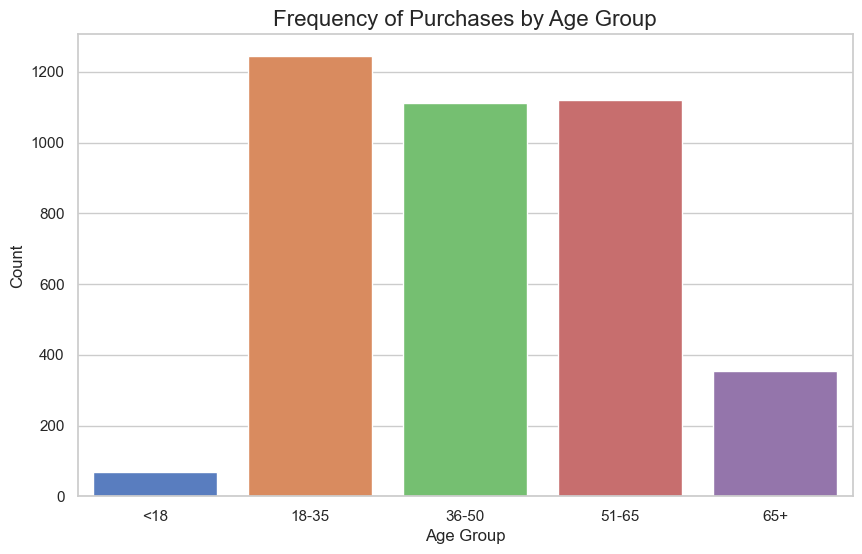

/var/folders/_j/pxtg33rs3657dcdtz9vydvkc0000gn/T/ipykernel_46881/2124336620.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Season', data=df, palette='coolwarm', order=df['Season'].value_counts().index)


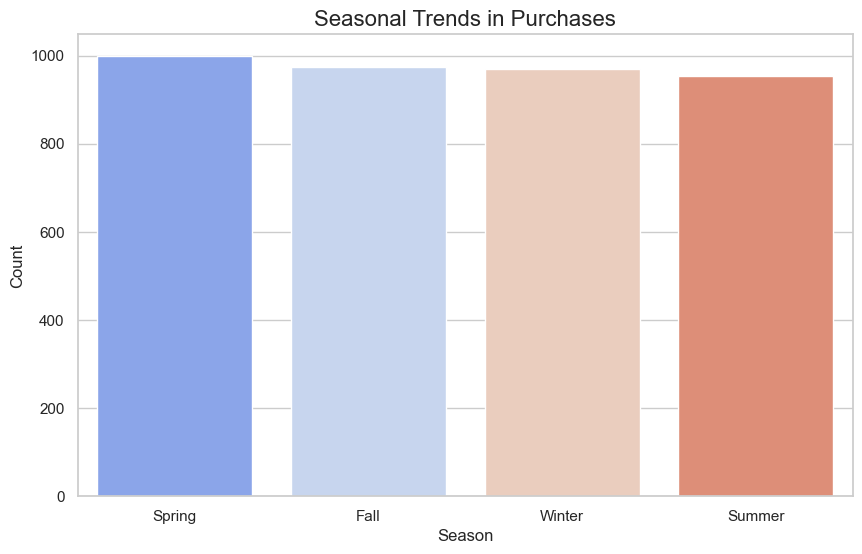

/var/folders/_j/pxtg33rs3657dcdtz9vydvkc0000gn/T/ipykernel_46881/2124336620.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_avg_rating.index, y=category_avg_rating.values, palette='viridis')


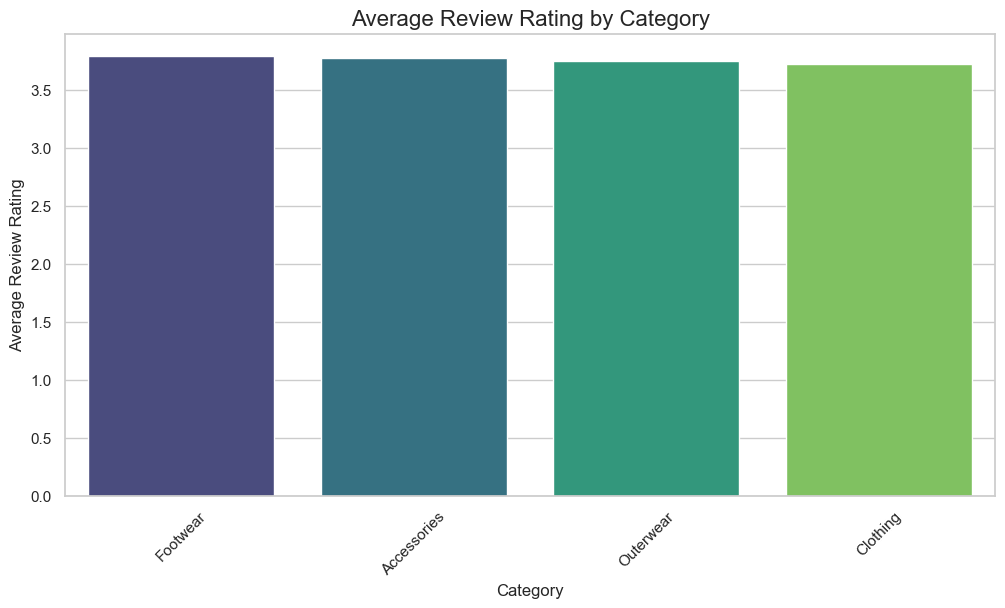

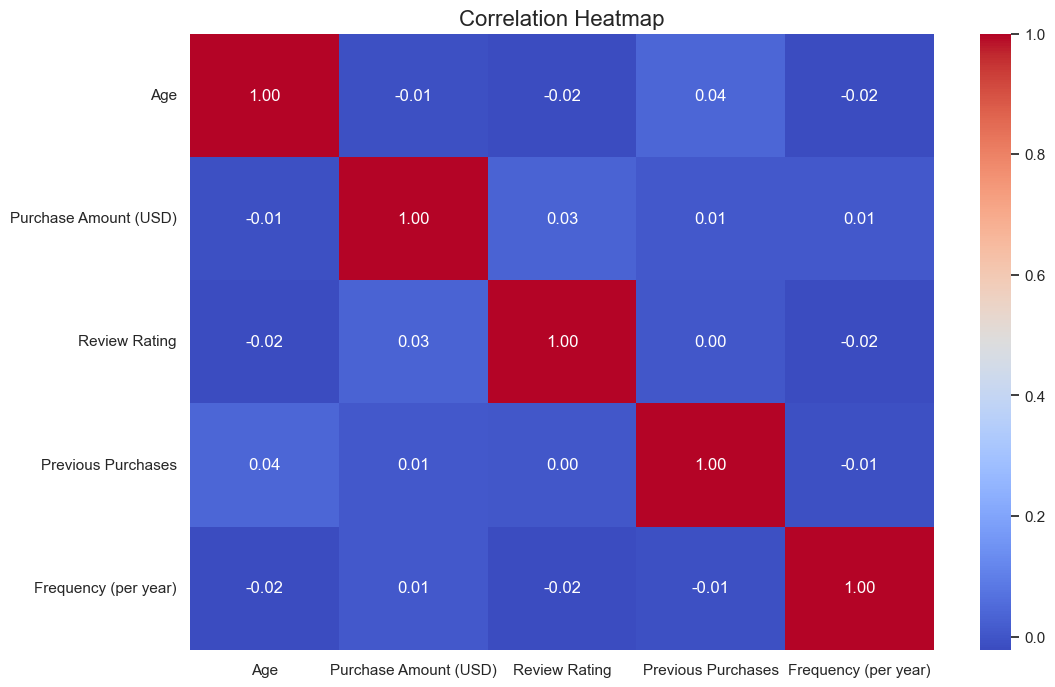

In [7]:
# Create visualizations to explore the data
import matplotlib.pyplot as plt
import seaborn as sns

# Set a consistent style for visualizations
sns.set(style="whitegrid")

# 1. Distribution of Purchase Amounts
plt.figure(figsize=(10, 6))
sns.histplot(df['Purchase Amount (USD)'], kde=True, bins=30, color='blue')
plt.title('Distribution of Purchase Amounts', fontsize=16)
plt.xlabel('Purchase Amount (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# 2. Purchase Amount by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Purchase Amount (USD)', data=df, palette='pastel')
plt.title('Purchase Amount by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Purchase Amount (USD)', fontsize=12)
plt.show()

# 3. Frequency of Purchases by Age Group
df['Age Group'] = pd.cut(df['Age'], bins=[0, 18, 35, 50, 65, 100], labels=['<18', '18-35', '36-50', '51-65', '65+'])
plt.figure(figsize=(10, 6))
sns.countplot(x='Age Group', data=df, palette='muted', order=['<18', '18-35', '36-50', '51-65', '65+'])
plt.title('Frequency of Purchases by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# 4. Seasonal Trends in Purchases
plt.figure(figsize=(10, 6))
sns.countplot(x='Season', data=df, palette='coolwarm', order=df['Season'].value_counts().index)
plt.title('Seasonal Trends in Purchases', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# 5. Average Review Rating by Category
plt.figure(figsize=(12, 6))
category_avg_rating = df.groupby('Category')['Review Rating'].mean().sort_values(ascending=False)
sns.barplot(x=category_avg_rating.index, y=category_avg_rating.values, palette='viridis')
plt.title('Average Review Rating by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Average Review Rating', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# 6. Correlation Heatmap
plt.figure(figsize=(12, 8))

# Select only numerical columns for the correlation matrix
numerical_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_df.corr()

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

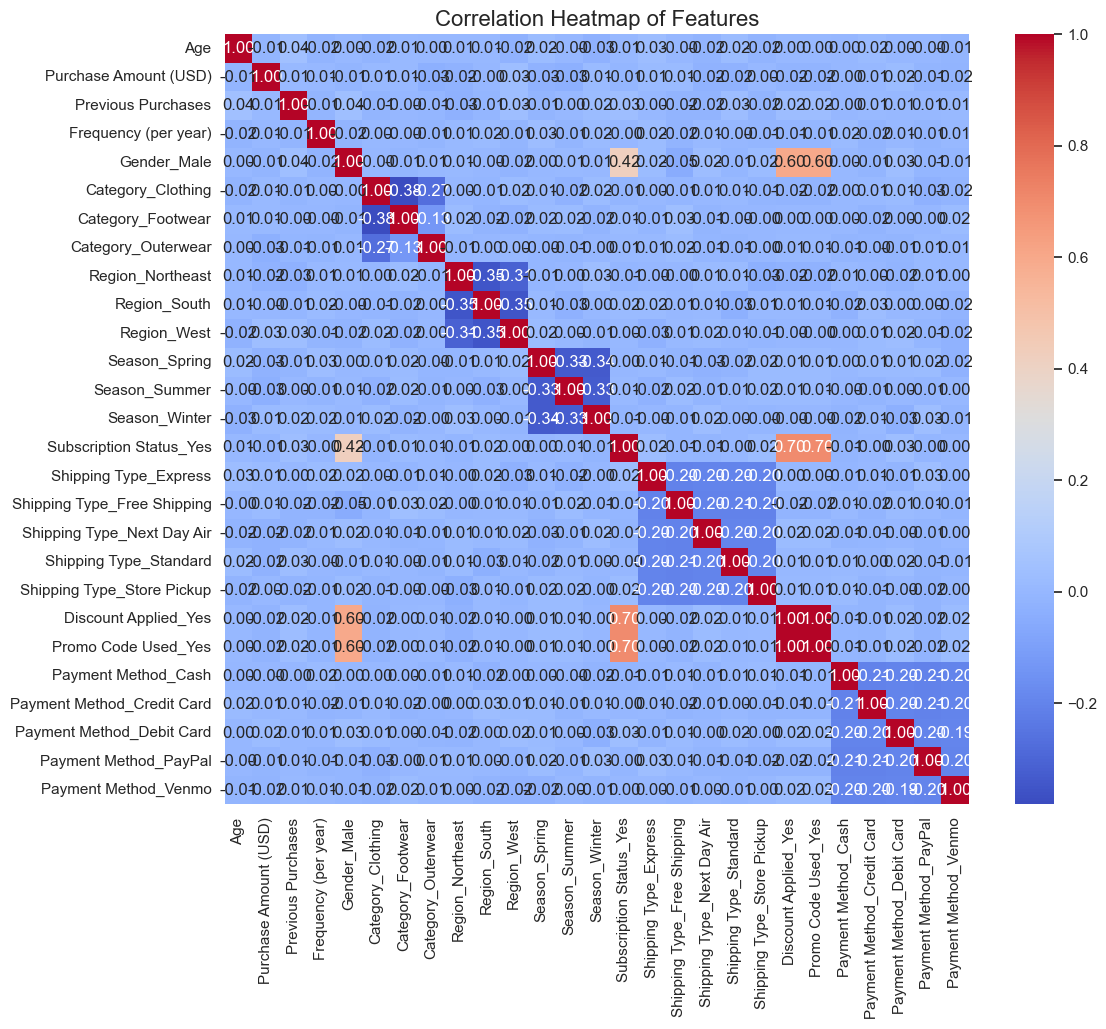

In [8]:
# Corr matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = prepared_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap of Features', fontsize=16)
plt.show()

1. **Gender_Male**:
   - Strong positive correlation with `Discount Applied_Yes` and `Promo Code Used_Yes` (0.60). This indicates that male customers are more likely to use discounts and promo codes.

2. **Subscription Status_Yes**:
   - Strong positive correlation with `Discount Applied_Yes` and `Promo Code Used_Yes` (0.70). Subscribed customers are significantly more likely to use discounts and promo codes.

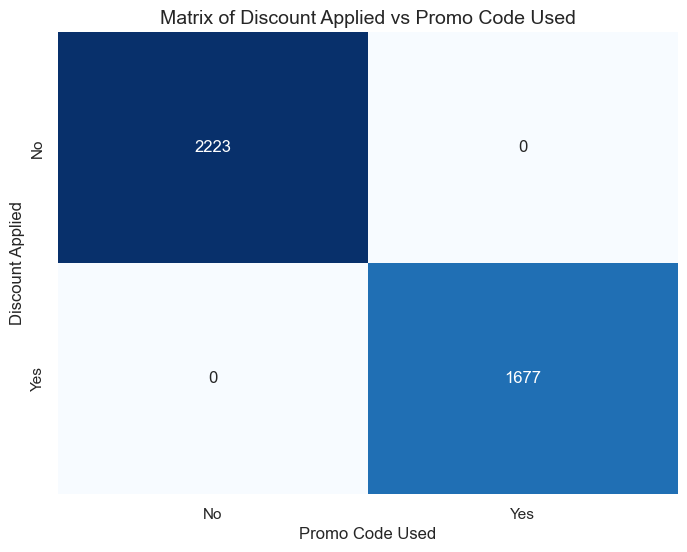

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a crosstab of Discount Applied and Promo Code Used
discount_promo_matrix = pd.crosstab(df['Discount Applied'], df['Promo Code Used'])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(discount_promo_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matrix of Discount Applied vs Promo Code Used", fontsize=14)
plt.xlabel("Promo Code Used")
plt.ylabel("Discount Applied")
plt.show()

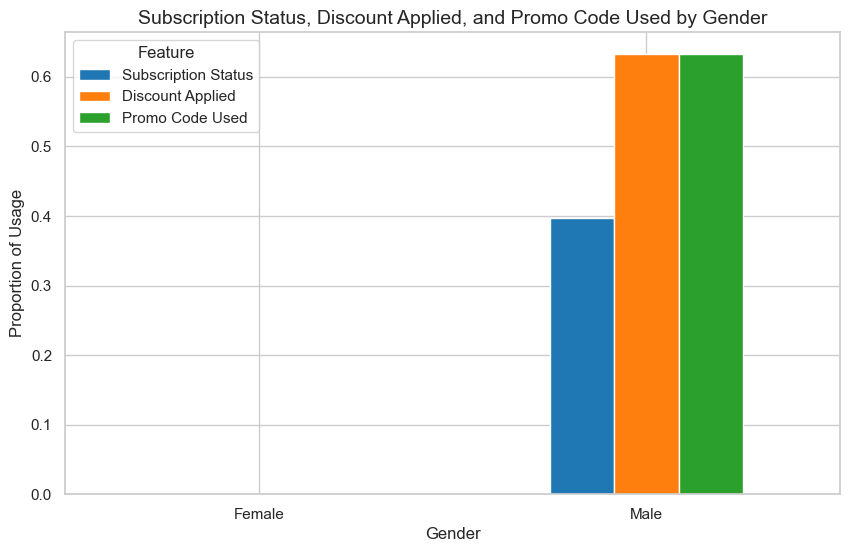

In [10]:
# Ensure Discount Applied, Promo Code Used, and Subscription Status are numeric
df['Discount Applied'] = df['Discount Applied'].map({'Yes': 1, 'No': 0})
df['Promo Code Used'] = df['Promo Code Used'].map({'Yes': 1, 'No': 0})
df['Subscription Status'] = df['Subscription Status'].map({'Yes': 1, 'No': 0})

# Group by Gender and calculate the mean usage of Subscription Status, Discount Applied, and Promo Code Used
gender_subscription_discount_promo = df.groupby('Gender')[['Subscription Status', 'Discount Applied', 'Promo Code Used']].mean()

# Plot the grouped bar chart
gender_subscription_discount_promo.plot(kind='bar', figsize=(10, 6), color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title("Subscription Status, Discount Applied, and Promo Code Used by Gender", fontsize=14)
plt.ylabel("Proportion of Usage")
plt.xlabel("Gender")
plt.xticks(rotation=0)
plt.legend(["Subscription Status", "Discount Applied", "Promo Code Used"], title="Feature")
plt.show()

**Three key takeaways**

1. **Perfect Overlap Between Discounts and Promo Codes**  
   - The _Matrix of Discount Applied vs Promo Code Used_ shows a perfect overlap: customers who applied a discount always used a promo code, and those who did not apply a discount never used a promo code. This suggests that discounts and promo codes are directly tied together in the dataset.

2. **Male Customers Dominate Subscriptions, Discounts, and Promo Code Usage**  
   - From the _Bar Plot of Subscription Status, Discount Applied, and Promo Code Used by Gender_, 39.7% of male customers are subscribed, and 63.2% of male customers applied discounts and used promo codes. Female customers, however, show no activity in these areas, indicating a lack of representation or engagement in the dataset.

3. **Potential Dataset Imbalance Across Genders**  
   - The absence of female customers in subscription, discount, and promo code usage suggests a potential imbalance in the dataset. This could indicate either a lack of data for female customers or that these behaviors are exclusive to male customers.

# <a id='toc5_'></a>[Question 2 (Clustering)](#toc0_)

#### <a id='toc5_1_1_1_'></a>[Q2.1 - Number of Customer Segments](#toc0_)

1. **Number of Clusters Selected**  
   - We selected **4 clusters**, guided by the Elbow plot (diminishing returns past k=4) and a **silhouette score of 0.7184** for k=4.

---

#### <a id='toc5_1_1_2_'></a>[Q2.2 - Are the Segments Well Defined? How Did You Measure It?](#toc0_)

2. **Cluster Definition and Measurement**  
   - We used the **Silhouette Score** (`silhouette_score` from `sklearn.metrics`) to evaluate cluster quality.  
   - A high overall silhouette score of **0.7184** indicates a very strong clustering structure with clearly defined clusters and good separation.  
   - Cluster-level silhouette scores further confirm that the clusters are well-defined, with minor overlaps in Cluster 1.

---

#### <a id='toc5_1_1_3_'></a>[Q2.3 - Interpretation of the Clusters](#toc0_)

3. **Cluster Interpretations**  
   - **Cluster 0**:  
     - High purchase frequency (~104/year).  
     - Moderate spend (~\$61).  
     - Moderate engagement with discounts and subscriptions.  

   - **Cluster 1**:  
     - Moderate purchase frequency (~41/year).  
     - Moderate spend (~\$59).  
     - Lower engagement with discounts (35%) and subscriptions (17%).  

   - **Cluster 2**:  
     - Low purchase frequency (~9/year).  
     - Moderate spend (~\$59).  
     - Highly engaged male shoppers (100% male, 100% use discounts and subscriptions).  

   - **Cluster 3**:  
     - Low purchase frequency (~5/year).  
     - Moderate spend (~\$60).  
     - Minimal engagement with discounts (22%) and no subscriptions (0%).  

   These segments exhibit distinct shopping patterns, informing more targeted marketing strategies

In [11]:
feature_subsets = [
    ['Age', 'Purchase Amount (USD)', 'Frequency (per year)'],  # General behavior
    ['Purchase Amount (USD)', 'Discount Applied_Yes', 'Promo Code Used_Yes'],  # Spending behavior
    ['Frequency (per year)', 'Subscription Status_Yes'],  # Engagement
    ['Age', 'Gender_Male', 'Region_Northeast', 'Region_South'],  # Demographics
]

Clustering with feature subset 1: ['Age', 'Purchase Amount (USD)', 'Frequency (per year)']


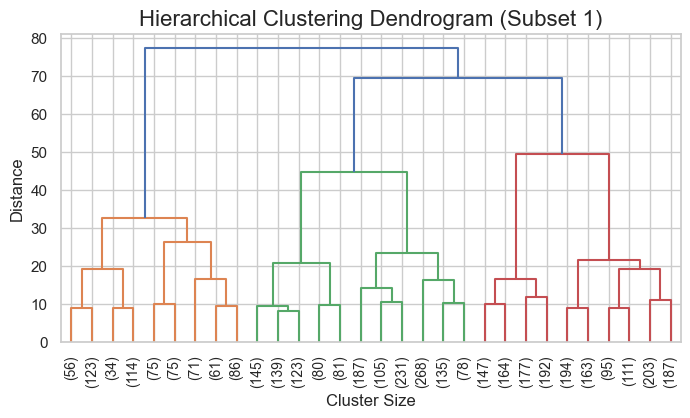

Clustering with feature subset 2: ['Purchase Amount (USD)', 'Discount Applied_Yes', 'Promo Code Used_Yes']


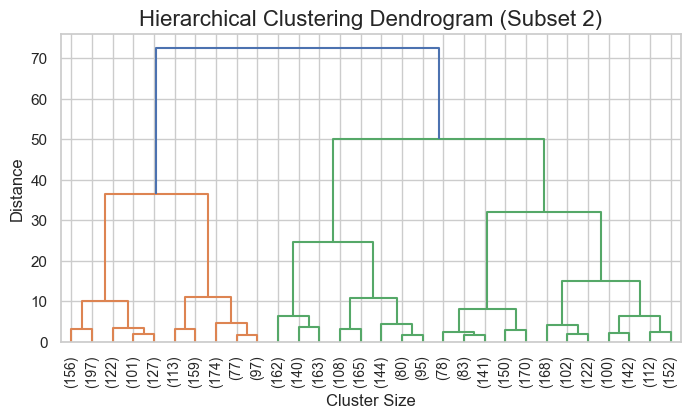

Clustering with feature subset 3: ['Frequency (per year)', 'Subscription Status_Yes']


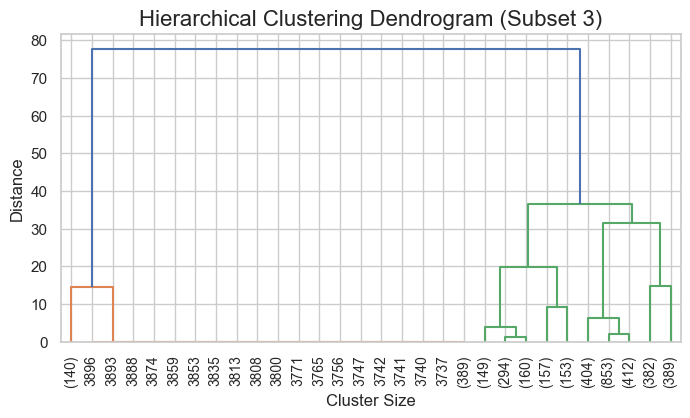

Clustering with feature subset 4: ['Age', 'Gender_Male', 'Region_Northeast', 'Region_South']


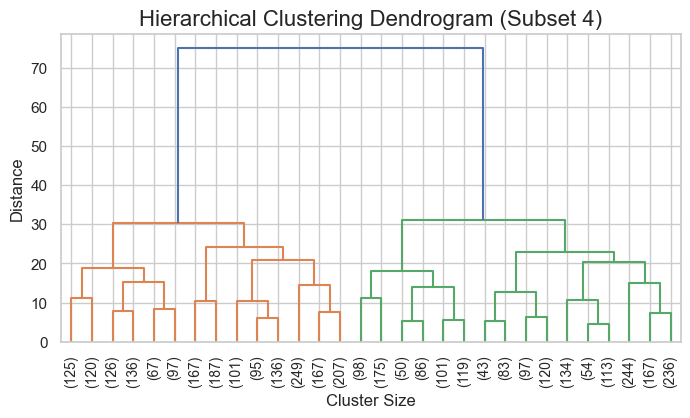

In [12]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Iterate through feature subsets
for i, features in enumerate(feature_subsets):
    print(f"Clustering with feature subset {i + 1}: {features}")
    
    # Select the subset of features
    subset_df = prepared_df[features]
    
    # Perform hierarchical clustering
    linkage_matrix = linkage(subset_df, method='ward')
    
    # Plot the dendrogram
    plt.figure(figsize=(8, 4))
    dendrogram(linkage_matrix, truncate_mode='lastp', p=30, leaf_rotation=90, leaf_font_size=10)
    plt.title(f'Hierarchical Clustering Dendrogram (Subset {i + 1})', fontsize=16)
    plt.xlabel('Cluster Size', fontsize=12)
    plt.ylabel('Distance', fontsize=12)
    plt.show()

Clustering with feature subset 1: ['Age', 'Purchase Amount (USD)', 'Frequency (per year)']


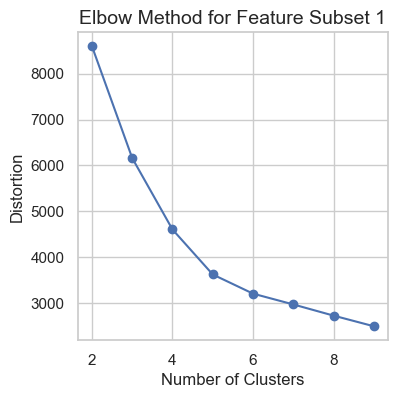

Clustering with feature subset 2: ['Purchase Amount (USD)', 'Discount Applied_Yes', 'Promo Code Used_Yes']


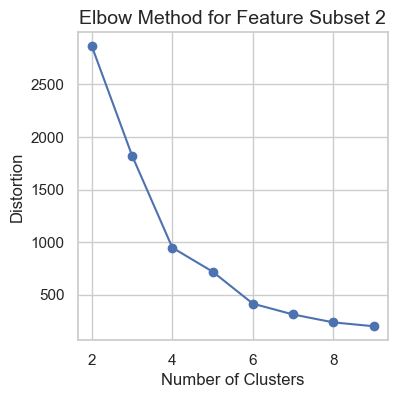

Clustering with feature subset 3: ['Frequency (per year)', 'Subscription Status_Yes']


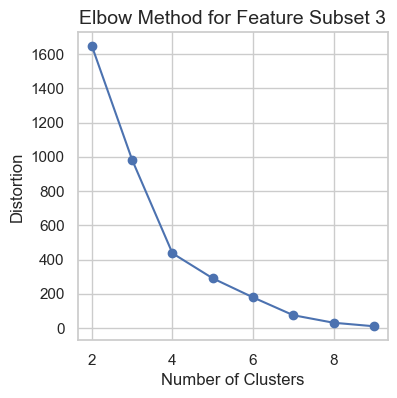

Clustering with feature subset 4: ['Age', 'Gender_Male', 'Region_Northeast', 'Region_South']


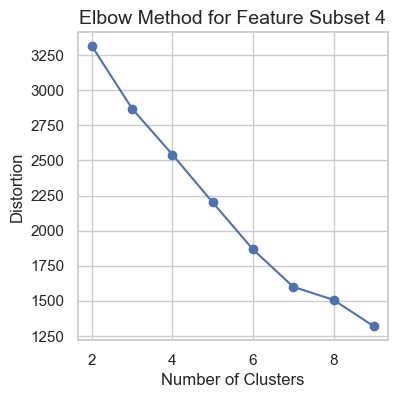

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Iterate through feature subsets
for i, features in enumerate(feature_subsets):
    print(f"Clustering with feature subset {i + 1}: {features}")
    
    # Select the subset of features
    subset_df = prepared_df[features]
    
    # Determine the optimal number of clusters using the elbow method
    distortions = []
    for k in range(2, 10):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(subset_df)
        distortions.append(kmeans.inertia_)
    
    # Plot the elbow curve
    plt.figure(figsize=(4, 4))
    plt.plot(range(2, 10), distortions, marker='o')
    plt.title(f'Elbow Method for Feature Subset {i + 1}', fontsize=14)
    plt.xlabel('Number of Clusters', fontsize=12)
    plt.ylabel('Distortion', fontsize=12)
    plt.show()

In [14]:
from sklearn.metrics import silhouette_score

# Evaluate clustering results
for i, features in enumerate(feature_subsets):
    print(f"Evaluating feature subset {i + 1}: {features}")
    
    # Select the subset of features
    subset_df = prepared_df[features]
    
    # Perform clustering (e.g., K-Means with 3 clusters)
    kmeans = KMeans(n_clusters=3, random_state=42)
    cluster_labels = kmeans.fit_predict(subset_df)
    
    # Compute silhouette score
    score = silhouette_score(subset_df, cluster_labels)
    print(f"Silhouette Score for subset {i + 1}: {score:.4f}")

Evaluating feature subset 1: ['Age', 'Purchase Amount (USD)', 'Frequency (per year)']
Silhouette Score for subset 1: 0.3157
Evaluating feature subset 2: ['Purchase Amount (USD)', 'Discount Applied_Yes', 'Promo Code Used_Yes']
Silhouette Score for subset 2: 0.4907
Evaluating feature subset 3: ['Frequency (per year)', 'Subscription Status_Yes']
Silhouette Score for subset 3: 0.6206
Evaluating feature subset 4: ['Age', 'Gender_Male', 'Region_Northeast', 'Region_South']
Silhouette Score for subset 4: 0.3321


**Takeaway from Feature Subset Evaluation**

1. **Feature Subset 3** (`['Frequency (per year)', 'Subscription Status_Yes']`) achieved the highest silhouette score (0.6206), indicating the best-defined clusters. This subset focuses on customer engagement and loyalty.

2. **Feature Subset 2** (`['Purchase Amount (USD)', 'Discount Applied_Yes', 'Promo Code Used_Yes']`) achieved the second-highest silhouette score (0.4907), forming reasonably well-defined clusters based on spending behavior.

3. **Recommendation**:
   - Proceed with **Feature Subset 3** as the primary focus for clustering to analyze engagement and loyalty.
   - Use **Feature Subset 2** as a secondary analysis to explore spending-based clusters.

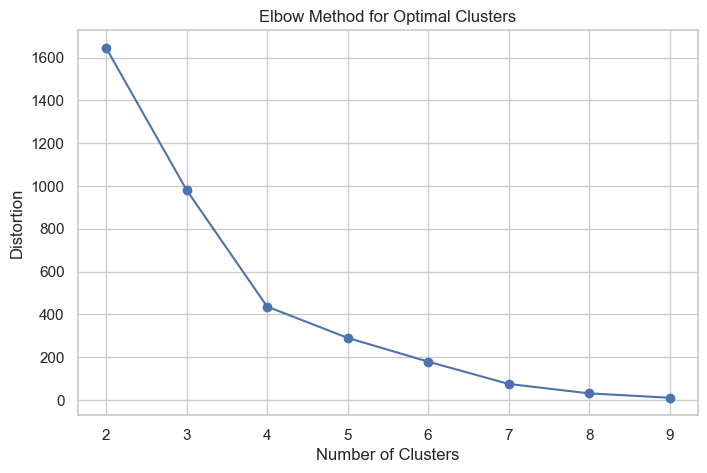

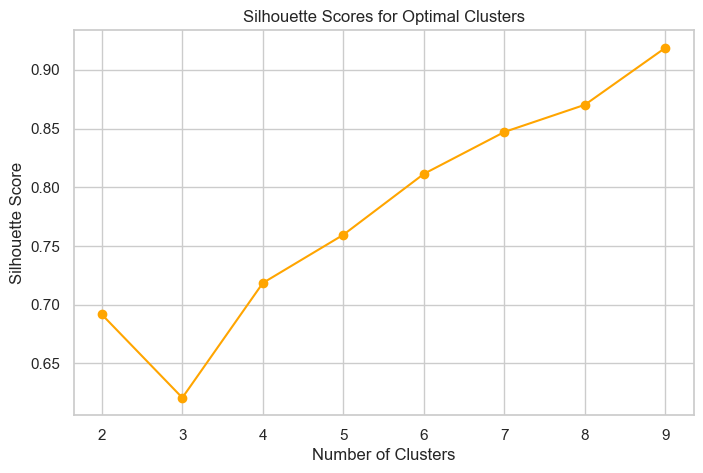

In [15]:
# Finding optimal number of clusters for the final feature set
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select the final feature set
final_features = ['Frequency (per year)', 'Subscription Status_Yes']
subset_df = prepared_df[final_features]

# Determine the optimal number of clusters using the elbow method
distortions = []
silhouette_scores = []

for k in range(2, 10):  # Test cluster sizes from 2 to 9
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(subset_df)
    distortions.append(kmeans.inertia_)  # Sum of squared distances
    silhouette_scores.append(silhouette_score(subset_df, kmeans.labels_))  # Silhouette score

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(2, 10), distortions, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Distortion")
plt.show()

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 10), silhouette_scores, marker='o', color='orange')
plt.title("Silhouette Scores for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

**Takeaway from Silhouette Scores and Distortions**

1. **Silhouette Scores**:
   - The silhouette scores steadily increase, reaching the highest value of **0.9188** for **8 clusters**.
   - However, higher silhouette scores with more clusters may indicate overfitting, as smaller clusters tend to have higher internal cohesion.

2. **Distortions (Elbow Method)**:
   - The distortions decrease sharply as the number of clusters increases, but the rate of decrease slows significantly after **4 clusters**.
   - The "elbow point" is at **4 clusters**, where the distortion starts to level off.

3. **Recommendation**:
   - Use **4 clusters** as the optimal number of clusters, balancing compactness and interpretability.
   - While more clusters (e.g., 8) yield higher silhouette scores, they may lead to overfitting and reduced interpretability.

4. **Next Steps**:
   - Perform clustering with **4 clusters** using the final feature set (`['Frequency (per year)', 'Subscription Status_Yes']`).
   - Map the cluster labels to the `df_dummies` DataFrame and proceed with interpretation (e.g., calculating cluster means, visualizing numeric and categorical features).
   - Analyze the characteristics of each cluster to derive actionable insights for customer engagement and loyalty strategies.

In [16]:
# Perform K-Means clustering with 4 clusters
from sklearn.cluster import KMeans

# Final feature set
final_features = ['Frequency (per year)', 'Subscription Status_Yes']
subset_df = prepared_df[final_features]

# Perform clustering
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(subset_df)

In [17]:
# Creating a dummy_df with only the one-hot encoded columns (no scaling) for sake of interpretation
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Let's define the same numeric and categorical columns as before, 
# BUT we'll skip scaling the numerics so we can see them in raw form.
numeric_features_no_scale = ['Age', 'Purchase Amount (USD)', 'Previous Purchases', 'Frequency (per year)']
categorical_features_no_scale = ['Gender', 'Category', 'Region', 'Season', 'Subscription Status', 
                                 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Payment Method']

# Create a pass-through for numeric columns (no standardization)
numeric_transformer_no_scale = 'passthrough'

# One-hot encode categorical columns (drop first to avoid collinearity)
categorical_transformer_no_scale = OneHotEncoder(drop='first', sparse_output=False)

preprocessor_cat_only = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_no_scale, numeric_features_no_scale),
        ('cat', categorical_transformer_no_scale, categorical_features_no_scale)
    ],
    remainder='drop'  # explicitly drop other columns if they exist
)

dummy_pipeline = Pipeline(steps=[
    ('preprocessor_no_scale', preprocessor_cat_only)
])

# Fit-transform your original df (not the scaled one)
dummy_data = dummy_pipeline.fit_transform(df)

# Build the column names for the new DataFrame
num_col_names = numeric_features_no_scale
cat_col_names = dummy_pipeline.named_steps['preprocessor_no_scale'].transformers_[1][1].get_feature_names_out(categorical_features_no_scale)
all_dummy_cols = list(num_col_names) + list(cat_col_names)

df_dummies = pd.DataFrame(dummy_data, columns=all_dummy_cols)

print("Shape of dummy-only DataFrame:", df_dummies.shape)
df_dummies.head()


Shape of dummy-only DataFrame: (3900, 27)


,Age,Purchase Amount (USD),Previous Purchases,Frequency (per year),Gender_Male,Category_Clothing,Category_Footwear,Category_Outerwear,Region_Northeast,Region_South,...,Shipping Type_Next Day Air,Shipping Type_Standard,Shipping Type_Store Pickup,Discount Applied_1,Promo Code Used_1,Payment Method_Cash,Payment Method_Credit Card,Payment Method_Debit Card,Payment Method_PayPal,Payment Method_Venmo
0,55.0,53.0,14.0,26.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,19.0,64.0,2.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
2,50.0,73.0,23.0,52.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
3,21.0,90.0,49.0,52.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4,45.0,49.0,31.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [18]:
# Add cluster labels to df_dummies
df_dummies['Cluster'] = cluster_labels

In [19]:
# Verify the mapping
df_dummies.head()

,Age,Purchase Amount (USD),Previous Purchases,Frequency (per year),Gender_Male,Category_Clothing,Category_Footwear,Category_Outerwear,Region_Northeast,Region_South,...,Shipping Type_Standard,Shipping Type_Store Pickup,Discount Applied_1,Promo Code Used_1,Payment Method_Cash,Payment Method_Credit Card,Payment Method_Debit Card,Payment Method_PayPal,Payment Method_Venmo,Cluster
0,55.0,53.0,14.0,26.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2
1,19.0,64.0,2.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,2
2,50.0,73.0,23.0,52.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1
3,21.0,90.0,49.0,52.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1
4,45.0,49.0,31.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,2


,Age,Purchase Amount (USD),Previous Purchases,Frequency (per year),Gender_Male,Category_Clothing,Category_Footwear,Category_Outerwear,Region_Northeast,Region_South,Region_West,Season_Spring,Season_Summer,Season_Winter,Subscription Status_1,Shipping Type_Express,Shipping Type_Free Shipping,Shipping Type_Next Day Air,Shipping Type_Standard,Shipping Type_Store Pickup,Discount Applied_1,Promo Code Used_1,Payment Method_Cash,Payment Method_Credit Card,Payment Method_Debit Card,Payment Method_PayPal,Payment Method_Venmo
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,43.20,60.69,24.79,104.00,0.66,0.45,0.15,0.07,0.25,0.29,0.23,0.28,0.24,0.26,0.26,0.18,0.15,0.18,0.16,0.16,0.41,0.41,0.18,0.14,0.18,0.16,0.18
1,43.98,59.22,25.44,41.10,0.64,0.43,0.16,0.09,0.22,0.30,0.24,0.26,0.23,0.27,0.17,0.17,0.18,0.15,0.17,0.16,0.35,0.35,0.18,0.19,0.15,0.17,0.15
2,43.85,59.45,25.78,9.39,1.00,0.43,0.17,0.08,0.23,0.29,0.24,0.25,0.25,0.24,1.00,0.17,0.17,0.16,0.17,0.19,1.00,1.00,0.16,0.17,0.18,0.18,0.16
3,44.50,59.90,25.30,5.20,0.57,0.46,0.14,0.08,0.25,0.27,0.24,0.25,0.25,0.24,0.00,0.16,0.18,0.17,0.17,0.16,0.22,0.22,0.17,0.17,0.16,0.18,0.16


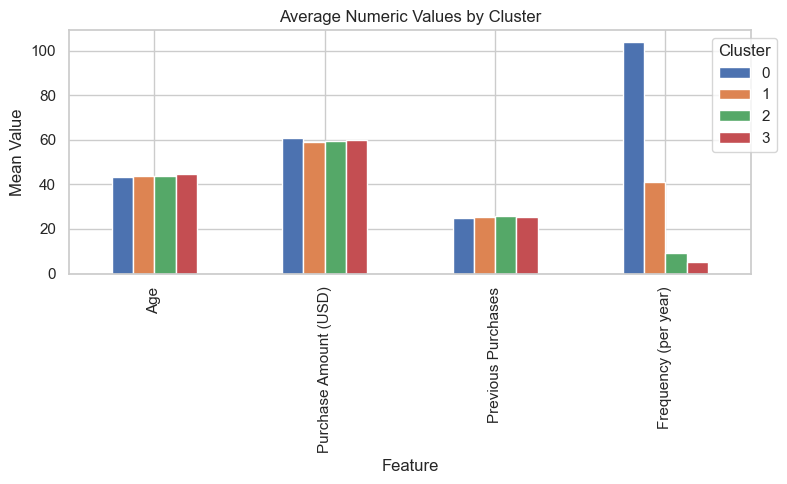

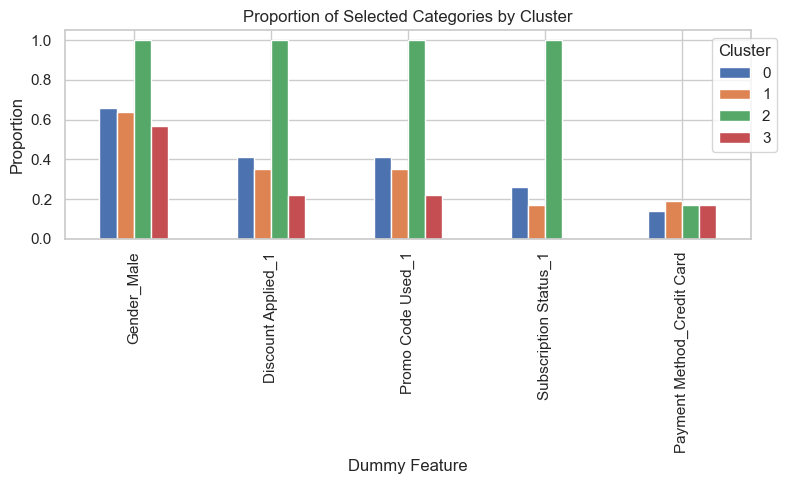

In [20]:
# Calculate average (mean) values per cluster
pd.set_option('display.max_columns', None)
cluster_means = df_dummies.groupby('Cluster').mean().round(2)
display(cluster_means)

# Visualize numeric columns
numeric_cols = ['Age', 'Purchase Amount (USD)', 'Previous Purchases', 'Frequency (per year)']
numeric_means = cluster_means[numeric_cols]

numeric_means.T.plot(kind='bar', figsize=(8, 5))
plt.title("Average Numeric Values by Cluster")
plt.ylabel("Mean Value")
plt.xlabel("Feature")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

# Visualize selected dummy columns
selected_dummy_cols = ['Gender_Male', 'Discount Applied_1', 'Promo Code Used_1', 
                       'Subscription Status_1', 'Payment Method_Credit Card']

dummy_means = cluster_means[selected_dummy_cols]

dummy_means.T.plot(kind='bar', figsize=(8, 5))
plt.title("Proportion of Selected Categories by Cluster")
plt.ylabel("Proportion")
plt.xlabel("Dummy Feature")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

**Cluster Interpretation**

1. **Cluster 0**:  
   - **Frequent shoppers** (104 purchases/year, highest).  
   - **66% male**, moderate use of discounts (41%) and subscriptions (26%).  
   - Balanced shipping and payment methods.  

2. **Cluster 1**:  
   - **Moderate shoppers** (41 purchases/year).  
   - **64% male**, lowest discount (35%) and subscription usage (17%).  
   - Slightly higher use of credit cards (19%).  

3. **Cluster 2**:  
   - **Highly engaged male shoppers** (100% male).  
   - Low frequency (9 purchases/year) but **100% use discounts and subscriptions**.  
   - Balanced shipping and payment methods.  

4. **Cluster 3**:  
   - **Low-frequency shoppers** (5 purchases/year, lowest).  
   - **57% male**, minimal discount (22%) and no subscription usage (0%).  
   - Balanced shipping and payment methods.  

**Key Differences**
- **Frequency**: Cluster 0 shops the most, Cluster 3 the least.  
- **Engagement**: Cluster 2 is highly engaged with discounts and subscriptions, while Cluster 3 has minimal engagement.  
- **Gender**: Cluster 2 is entirely male, while Cluster 3 has the lowest proportion of males (57%).  

Overall Silhouette Score: 0.7184


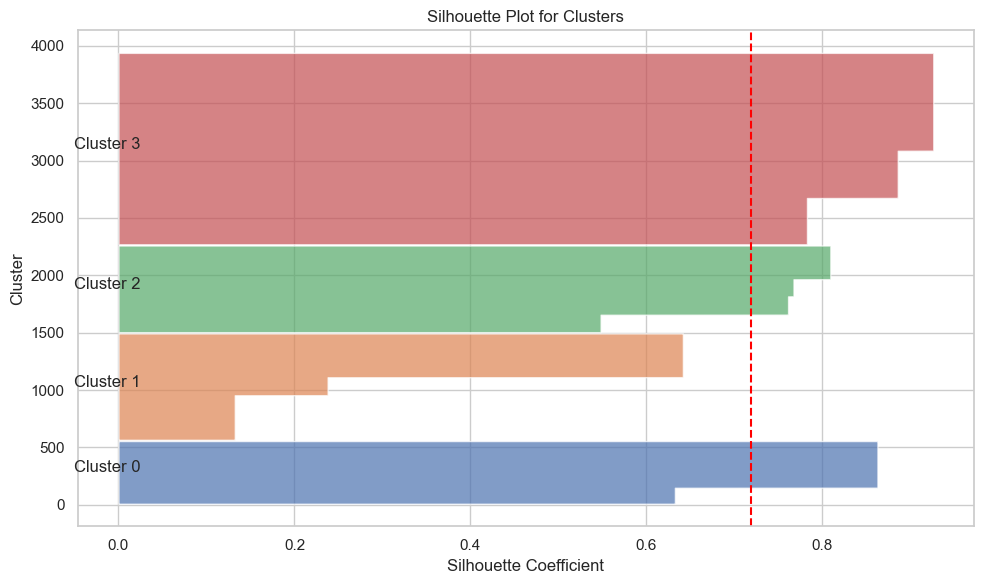

In [21]:
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np
import matplotlib.pyplot as plt

# Compute silhouette scores for all points
silhouette_vals = silhouette_samples(subset_df, cluster_labels)
overall_silhouette_score = silhouette_score(subset_df, cluster_labels)

# Add silhouette scores to the DataFrame for analysis
df_dummies['Silhouette Score'] = silhouette_vals

# Print overall silhouette score
print(f"Overall Silhouette Score: {overall_silhouette_score:.4f}")

# Plot silhouette scores for each cluster
plt.figure(figsize=(10, 6))
y_lower = 10
for i in range(optimal_clusters):
    # Aggregate silhouette scores for points in cluster i
    cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
    cluster_silhouette_vals.sort()
    y_upper = y_lower + len(cluster_silhouette_vals)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * len(cluster_silhouette_vals), f"Cluster {i}")
    y_lower = y_upper + 10  # Add space between clusters

plt.axvline(x=overall_silhouette_score, color="red", linestyle="--")
plt.title("Silhouette Plot for Clusters")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()

**Q2.2 - Are the Clusters Well Defined?**

**Overall Silhouette Coefficient**:  
- The overall silhouette coefficient is **0.7184**, indicating a very strong clustering structure with clearly defined clusters and good separation.

**Cluster-Level Silhouette Scores**:
1. **Cluster 0**:  
   - Exhibits very high silhouette scores, showing clear cohesion among frequent shoppers.
2. **Cluster 1**:  
   - Shows positive silhouette scores, but slightly lower than Clusters 0 and 2, indicating moderate internal consistency.
3. **Cluster 2**:  
   - Clearly defined and highly cohesive; silhouette scores are consistently high, reflecting a well-defined, homogeneous segment of highly engaged male shoppers.
4. **Cluster 3**:  
   - Has consistently positive and relatively high silhouette scores, indicating good cohesion for this larger, less frequent segment.

**Key Observations**:
- **Cluster 0** (Frequent Shoppers) and **Cluster 2** (Highly Engaged Male Shoppers) are particularly well-defined with consistently high silhouette scores.
- **Cluster 1** (Moderately Engaged Customers) is fairly well-defined but has slight overlaps, suggesting marginal boundary uncertainties.
- **Cluster 3** is the largest segment and shows strong internal cohesion and clear distinction from other clusters, representing customers with distinct low-engagement patterns.

**Conclusion**:  
The clusters are well-defined and appropriate for actionable business insights, with minor attention required to refine Cluster 1 boundaries further.

# <a id='toc6_'></a>[Question 3 (Predicting loyalty)](#toc0_)

#### <a id='toc6_1_1_1_'></a>[Q3.1 - Develop Two Models](#toc0_)

1. **Models Developed**:  
   - **Logistic Regression**:  
     - Chosen for its simplicity, interpretability, and effectiveness in binary classification tasks like identifying loyal customers.  
     - It performs well with relatively small datasets and provides probabilities for predictions, which can be useful for ranking customers by loyalty likelihood.  

   - **Random Forest**:  
     - Chosen for its ability to handle non-linear relationships and interactions between features.  
     - It is robust to overfitting and provides feature importance, which can help understand the drivers of customer loyalty.  

---

#### <a id='toc6_1_1_2_'></a>[Q3.2 - Model Choice and Metric](#toc0_)

2. **Model Selected**: Logistic Regression  
   - **Reason**: Logistic Regression achieved a slightly higher F1-Score (**0.58**) and better recall (**0.68**) compared to Random Forest (F1-Score: **0.56**, Recall: **0.58**).  
   - Recall was prioritized to ensure that most loyal customers are identified, aligning with the business goal of enhancing loyalty programs and retention strategies.  

3. **Metric Considered**:  
   - **F1-Score**: Balances precision and recall, ensuring a good trade-off between identifying loyal customers and minimizing false positives.  
   - **Recall**: Prioritized to avoid missing loyal customers, even at the cost of slightly lower precision.  

4. **Recommendation**:  
   - Deploy **Logistic Regression** for predicting customer loyalty due to its better recall and interpretability, ensuring that more loyal customers are identified for targeted retention strategies.

In [22]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Frequency (per year),Region,Age Group
0,1,55,Male,Blouse,Clothing,53.0,Kentucky,L,Gray,Winter,3.1,1,Express,1,1,14,Venmo,Fortnightly,26.0,South,51-65
1,2,19,Male,Sweater,Clothing,64.0,Maine,L,Maroon,Winter,3.1,1,Express,1,1,2,Cash,Fortnightly,26.0,Northeast,18-35
2,3,50,Male,Jeans,Clothing,73.0,Massachusetts,S,Maroon,Spring,3.1,1,Free Shipping,1,1,23,Credit Card,Weekly,52.0,Northeast,36-50
3,4,21,Male,Sandals,Footwear,90.0,Rhode Island,M,Maroon,Spring,3.5,1,Next Day Air,1,1,49,PayPal,Weekly,52.0,Northeast,18-35
4,5,45,Male,Blouse,Clothing,49.0,Oregon,M,Turquoise,Spring,2.7,1,Free Shipping,1,1,31,PayPal,Annually,1.0,West,36-50


In [23]:
# Define loyalty based on Subscription Status and Frequency (per year)
loyalty_threshold = 4  # Chosen threshold for Frequency (per year) to define a loyal customer
df['Loyalty'] = df.apply(lambda row: 1 if row['Subscription Status'] == 1 and row['Frequency (per year)'] >= loyalty_threshold else 0, axis=1)

# Check the distribution of the Loyalty column
print("Loyalty Distribution:")
print(df['Loyalty'].value_counts(normalize=True))

Loyalty Distribution:
Loyalty
0    0.771026
1    0.228974
Name: proportion, dtype: float64


23% of people are marked as "loyal" based on our definition above.

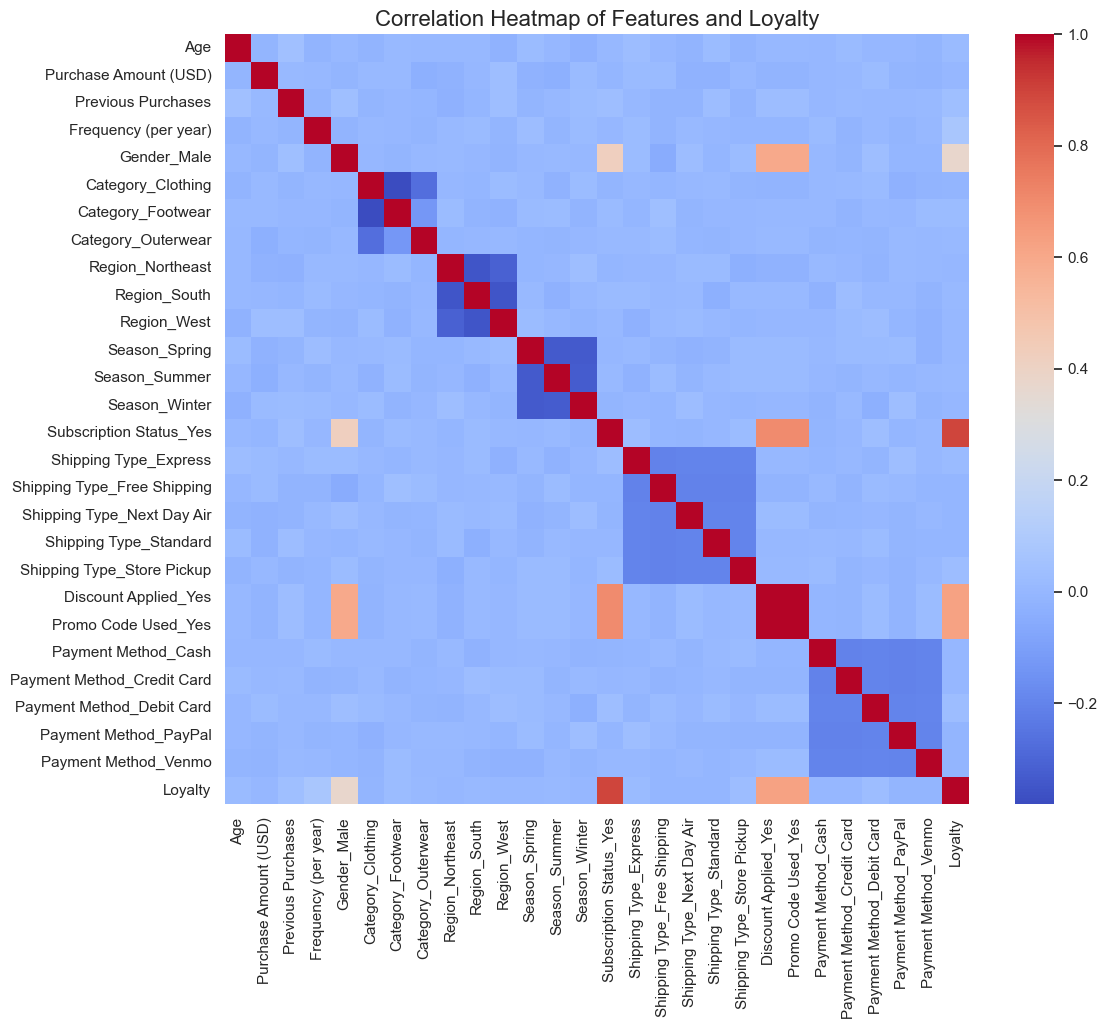

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Append the Loyalty column to the prepared_df
prepared_df_with_loyalty = prepared_df.copy()
prepared_df_with_loyalty['Loyalty'] = df['Loyalty']

# Compute the correlation matrix
correlation_matrix = prepared_df_with_loyalty.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True, fmt=".2f")
plt.title('Correlation Heatmap of Features and Loyalty', fontsize=16)
plt.show()

In [25]:
# Split dataset
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Define features (X) and target (y)
# Exclude 'Subscription Status' and 'Frequency (per year)' if they were used to define 'Loyalty'
excluded_columns = ['Subscription Status_Yes', 'Frequency (per year)', 'Promo Code Used_Yes']
X = prepared_df.drop(columns=excluded_columns, errors='ignore')  # Drop columns if they exist
y = df['Loyalty']  # Target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
logistic_model = LogisticRegression(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)

In [26]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Logistic Regression
logistic_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs'],  # Solvers
    'max_iter': [100, 200, 500]  # Maximum iterations
}

# Perform Grid Search for Logistic Regression
logistic_grid_search = GridSearchCV(estimator=logistic_model, param_grid=logistic_param_grid, scoring='f1', cv=5, n_jobs=-1)
logistic_grid_search.fit(X_train, y_train)

# Best parameters and model for Logistic Regression
best_logistic_model = logistic_grid_search.best_estimator_
print("Best parameters for Logistic Regression:", logistic_grid_search.best_params_)

# Evaluate the best Logistic Regression model
y_pred_logistic = best_logistic_model.predict(X_test)
print("\nLogistic Regression Performance (after tuning):")
print(classification_report(y_test, y_pred_logistic))
logistic_f1 = f1_score(y_test, y_pred_logistic)
print(f"F1-Score: {logistic_f1}")

# Define parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples required to be at a leaf node
}

# Perform Grid Search for Random Forest
rf_grid_search = GridSearchCV(estimator=random_forest_model, param_grid=rf_param_grid, scoring='f1', cv=5, n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

# Best parameters and model for Random Forest
best_rf_model = rf_grid_search.best_estimator_
print("\nBest parameters for Random Forest:", rf_grid_search.best_params_)

# Evaluate the best Random Forest model
y_pred_rf = best_rf_model.predict(X_test)
print("\nRandom Forest Performance (after tuning):")
print(classification_report(y_test, y_pred_rf))
rf_f1 = f1_score(y_test, y_pred_rf)
print(f"F1-Score: {rf_f1}")

Best parameters for Logistic Regression: {'C': 1, 'max_iter': 100, 'solver': 'liblinear'}

Logistic Regression Performance (after tuning):
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       594
           1       0.51      0.68      0.58       186

    accuracy                           0.77       780
   macro avg       0.70      0.74      0.71       780
weighted avg       0.80      0.77      0.78       780

F1-Score: 0.5825688073394495

Best parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Random Forest Performance (after tuning):
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       594
           1       0.54      0.58      0.56       186

    accuracy                           0.78       780
   macro avg       0.70      0.71      0.71       780
weighted avg       0.79      0.78      0.78       780

F1-Score: 0.5

# <a id='toc7_'></a>[Question 4 (Recommendation System)](#toc0_)

#### <a id='toc7_1_1_1_'></a>[Q4.1 - Developing a Recommendation System Aligned with Customer Behavior](#toc0_)

1. **Approach**:  
   - Implement a **content-based recommendation system** using item features (e.g., category, color, season) and customer purchase history to personalize recommendations.  
   - Since the dataset contains **one row per customer**, collaborative filtering is not feasible, making content-based filtering the most suitable approach.

2. **Justification**:  
   - **Relevance**: Ensures recommendations align with customer preferences by leveraging item attributes.  
   - **Personalization**: Tailored to individual purchase history, even with limited customer data.  
   - **Scalability**: Works for new customers or items without requiring extensive interaction data.  

---

#### <a id='toc7_1_1_2_'></a>[Q4.2 - Evaluating the Model](#toc0_)

3. **Evaluation Metrics**:  
   - **Precision@5**: 0.40 (40% of top 5 recommendations are relevant).  
   - **Recall@5**: 0.18 (18% of relevant items captured in top 5).  
   - **MRR**: 1.00 (Most relevant item ranked at the top).  

**Note**:  
These evaluation scores are based on a **category-item-based approach** to define relevant items. Items are considered relevant if they belong to the same category as the purchased item, ensuring that recommendations align with customer preferences within a specific product category.

---

#### <a id='toc7_1_1_3_'></a>[Q4.3 - Suggestions to Improve the Dataset](#toc0_)

4. **Suggestions**:  
   - **Include Multiple Rows Per User**:  
     - Ensure the dataset captures multiple transactions per customer to better understand their preferences and enable collaborative filtering.  

   - **Incorporate Customer Interaction Data**:  
     - Add features like click-through rates, time spent viewing items, and wishlist additions to better capture customer intent.  

   - **Expand Item Metadata**:  
     - Include additional attributes such as brand, material, price range, and customer reviews to enhance item profiles and improve recommendation quality.

In [27]:
# Combine relevant features into a single column
df['combined_features'] = (
    df['Category'].astype(str) + " " +
    df['Item Purchased'].astype(str) + " " +
    df['Color'].astype(str) + " " +
    df['Season'].astype(str)
)

# Check the combined features
print(df[['Item Purchased', 'combined_features']].head())

  Item Purchased                 combined_features
0         Blouse       Clothing Blouse Gray Winter
1        Sweater    Clothing Sweater Maroon Winter
2          Jeans      Clothing Jeans Maroon Spring
3        Sandals    Footwear Sandals Maroon Spring
4         Blouse  Clothing Blouse Turquoise Spring


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english')

# Fit and transform the combined features
tfidf_matrix = tfidf.fit_transform(df['combined_features'])

# Check the shape of the resulting matrix
print("TF-IDF Matrix Shape:", tfidf_matrix.shape)

TF-IDF Matrix Shape: (3900, 57)


In [29]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute cosine similarity between items
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Check the similarity matrix
print("Cosine Similarity Matrix Shape:", cosine_sim.shape)

Cosine Similarity Matrix Shape: (3900, 3900)


In [30]:
# Create function to recommend items based on similarity
def recommend_items(item_name, cosine_sim=cosine_sim, df=df, top_n=5):
    # Check if the item exists in the dataset
    if item_name not in df['Item Purchased'].values:
        print(f"Error: Item '{item_name}' not found in the dataset.")
        return pd.DataFrame()  # Return an empty DataFrame

    # Get the index of the item
    idx = df[df['Item Purchased'] == item_name].index[0]

    # Get similarity scores for the item
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort items by similarity score
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the indices of the top_n most similar items, excluding the same product
    sim_indices = [i[0] for i in sim_scores if df.iloc[i[0]]['Item Purchased'] != item_name][:top_n]

    # Return the top_n most similar items
    return df.iloc[sim_indices]


In [31]:
# Example: Recommend items similar to a specific item
item_to_test = "Sweater"  
recommended_items = recommend_items(item_name=item_to_test, top_n=5)
print(f"Recommendations for '{item_to_test}':")
print(recommended_items[['Item Purchased', 'Category', 'Color', 'Season']])

Recommendations for 'Sweater':
     Item Purchased  Category   Color  Season
36          T-shirt  Clothing  Maroon  Winter
332           Shirt  Clothing  Maroon  Winter
440           Shirt  Clothing  Maroon  Winter
1669        T-shirt  Clothing  Maroon  Winter
3529        T-shirt  Clothing  Maroon  Winter


In [32]:
# Evaluate the recommendation system using Precision@K, Recall@K, and MRR (ASSUMING RELEVANT ITEMS ARE IN THE SAME CATEGORY)
# Define relevant items based on the same Category
def get_relevant_items(item_name, df):
    # Get items in the same category as the input item
    if item_name not in df['Item Purchased'].values:
        print(f"Error: Item '{item_name}' not found in the dataset.")
        return []
    category = df[df['Item Purchased'] == item_name]['Category'].values[0]
    relevant_items = df[df['Category'] == category]['Item Purchased'].unique().tolist()
    return relevant_items

# Precision@K
def precision_at_k(recommended_items, relevant_items, k):
    recommended_at_k = recommended_items[:k]
    relevant_at_k = set(recommended_at_k).intersection(set(relevant_items))
    return len(relevant_at_k) / k

# Recall@K
def recall_at_k(recommended_items, relevant_items, k):
    recommended_at_k = recommended_items[:k]
    relevant_at_k = set(recommended_at_k).intersection(set(relevant_items))
    return len(relevant_at_k) / len(relevant_items) if relevant_items else 0

# Mean Reciprocal Rank (MRR)
def mean_reciprocal_rank(recommended_items, relevant_items):
    for i, item in enumerate(recommended_items):
        if item in relevant_items:
            return 1 / (i + 1)
    return 0

# Example usage
item_to_test = "Sweater"  
recommended_items = recommend_items(item_name=item_to_test, top_n=5)['Item Purchased'].tolist()
relevant_items = get_relevant_items(item_to_test, df)

# Evaluate
k = 5
print(f"Precision@{k}: {precision_at_k(recommended_items, relevant_items, k):.2f}")
print(f"Recall@{k}: {recall_at_k(recommended_items, relevant_items, k):.2f}")
print(f"MRR: {mean_reciprocal_rank(recommended_items, relevant_items):.2f}")

Precision@5: 0.40
Recall@5: 0.18
MRR: 1.00


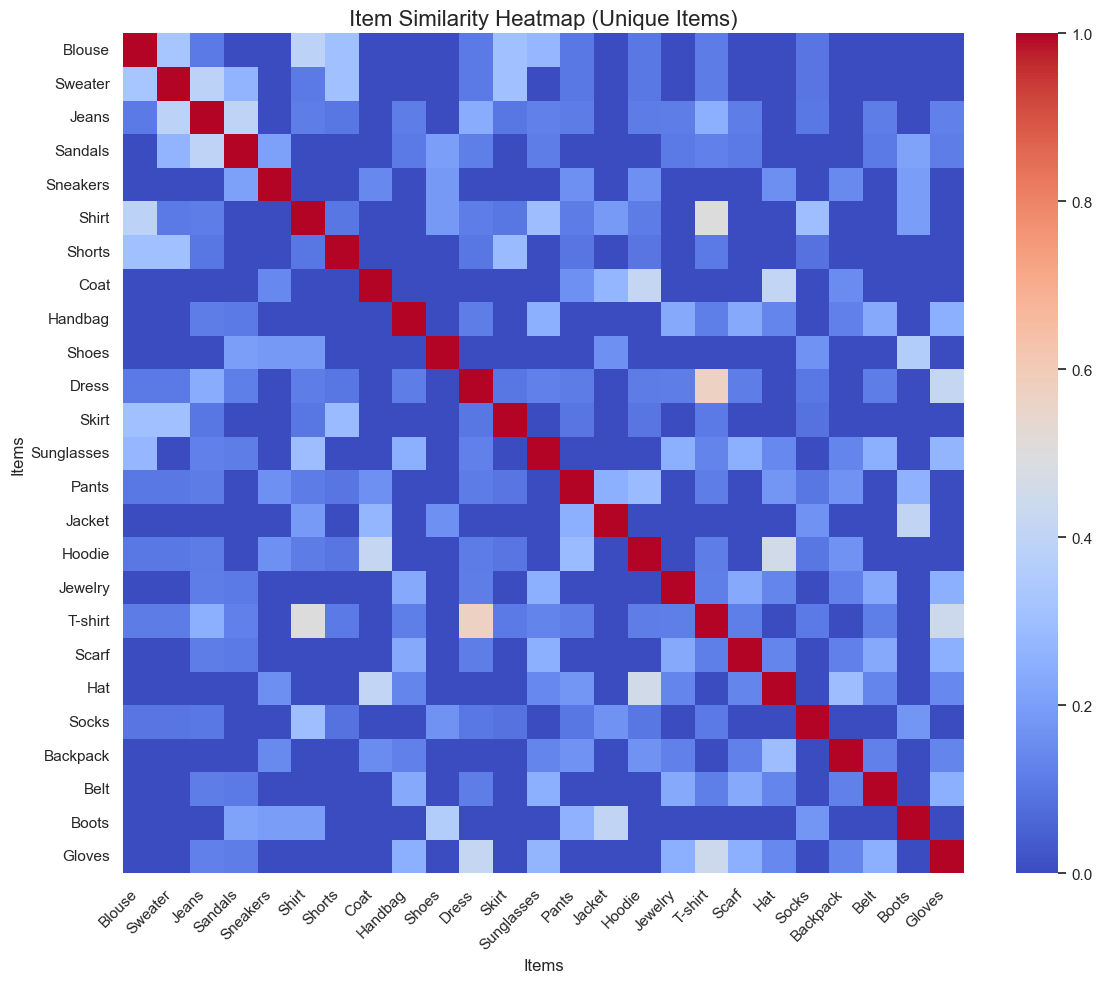

In [33]:
# PRINT SIMILARITY MATRIX 
import seaborn as sns
import matplotlib.pyplot as plt

# Remove duplicate items from the DataFrame
unique_items = df.drop_duplicates(subset=['Item Purchased'])

# Recompute the cosine similarity matrix for unique items
tfidf_matrix_unique = tfidf.fit_transform(unique_items['combined_features'])
cosine_sim_unique = cosine_similarity(tfidf_matrix_unique, tfidf_matrix_unique)

# Convert the similarity matrix to a DataFrame
item_similarity_df_unique = pd.DataFrame(
    cosine_sim_unique, 
    index=unique_items['Item Purchased'], 
    columns=unique_items['Item Purchased']
)

# Plot the heatmap for unique items
plt.figure(figsize=(12, 10))
sns.heatmap(item_similarity_df_unique, cmap="coolwarm", annot=False, cbar=True)
plt.title("Item Similarity Heatmap (Unique Items)", fontsize=16)
plt.xlabel("Items", fontsize=12)
plt.ylabel("Items", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

All similarity scores in the matrix make sense based on visual inspection. 

THANK YOU! 